<a href="https://colab.research.google.com/github/CogGal/CogGal/blob/master/StatMethodsPsy20_Lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4 - Separating many Normal distributions: 
## Are two variances the same? the F-distribution and the ANOVA test

In [ ]:
#@title Only if requested - change group number
import pandas as pd
import seaborn as sns
import numpy as np
import random
import io
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import math 
import itertools as itr
from ipywidgets import interact,interactive
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

group_number = 1 #@param {type:"number"}

sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(10,10)});
sns.set_context("talk")


colorsG = ["#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d",
           "#b6f6bb","#aaeeaf", "#9add9f", "#83ce89", "#78c17d"]


def plot_dist(dist, bins="auto", kde=False, fit="None", color="b", stat="density",height=8, aspect=1):
  #for frequency - set stat to "count"
  #aspect*height=width
  plt.figure(0);
  sns.displot(dist, kde=kde,bins=bins,stat=stat,color=color,height=height, aspect=aspect);
  if (fit=="Normal") & (stat=="density"):  
    d = stats.norm.fit(dist)
    mu = d[0]; sigma = d[1]
    x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 200) #limits of dist
    plt.plot(x, stats.norm.pdf(x, mu, sigma),color="black");
  elif (fit=="F") & (stat=="density"):  
    d = stats.f.fit(dist)
    dfn = d[0]; dfd = d[1]
    interval = stats.f.interval(.995,dfn,dfd) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.f.pdf(x, dfn, dfd),color="black");
  elif (fit=="gamma") & (stat=="density"):  
    d = stats.gamma.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.gamma.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.gamma.pdf(x, a, loc, scale),color="black");
  elif (fit=="t") & (stat=="density"):  
    d = stats.t.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.t.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.t.pdf(x, a, loc, scale),color="black");

def sample_n_groups_and_test(nsamples,group_size,seed):
  np.random.seed(seed)
  samples = np.zeros(group_size*nsamples) ##all the samples together
  distnum = np.zeros(group_size*nsamples)
  sep_samples=  []
  for i in range(nsamples):##sample n distributions of mean 100 and sd 60, and put them on a vector with labels
    samples[(i*group_size):((i+1)*group_size)] = np.random.normal(100,80,group_size)
    sep_samples.append(samples[(i*group_size):((i+1)*group_size)]) ##for later calculation of t tests, separate samples
    distnum[(i*group_size):((i+1)*group_size)] = ([i]*group_size)
    
    
  distributions = {"observation":samples, "sample #":distnum}
  plt.figure(2)
  df = pd.DataFrame.from_dict(distributions);

  Tscores = np.zeros(len(list(itr.combinations(range(nsamples),2))))
  pVals = np.zeros(len(list(itr.combinations(range(nsamples),2))))
  k=0;
  compareList=[]
  for i in list(itr.combinations(range(nsamples),2)):###run on all possible comparisons and calculate t scores
    Tscores[k] = abs(stats.ttest_ind(sep_samples[i[0]],sep_samples[i[1]]).statistic)
    pVals[k] = stats.ttest_ind(sep_samples[i[0]],sep_samples[i[1]]).pvalue
    compareList.append(i)
    k=k+1

  Tdf = pd.DataFrame({'Comparison':  [(a+1,b+1) for a,b in compareList], 't_score': Tscores})
  plt.figure(3)
  plt.figure(figsize=(2*nsamples,6));
  with sns.color_palette(colorsG):
    ax = sns.barplot(x='Comparison', y='t_score', data=Tdf);
  ax.tick_params(axis="x", labelsize=8)
  plt.title("Absolute scores of ALL possible t-tests, *-p<0.05")
  for i in range(len(pVals)):##if the t-test score is significant, show *
    if pVals[i] < 0.05:
      ax.text(i-0.1,Tscores[i]+0.01,"*",fontsize=15);


In [ ]:
#@title
urlHeight = 'https://raw.githubusercontent.com/uvhart/StatPsyMethods/master/StatMethodsPsy-Lect5.csv'
data = pd.read_csv(urlHeight)

# Slide 0: Intro
## In previous class we learned how to distinguish between two Normal distributions using the t-test and the t-distribution. 

## Question 1: The t-test is affected by:
### A. The distance between the two means
### B. The distance between the two means, the standard deviation of each sample, and the size of each sample
### C. The standard deviation of each sample, and the size of each sample
### D. The distance between the two means, and the size of each sample, and the median of the two samples

# Slide 1: In this class, we are going to learn how to separate between many Normal samples

Text(0.5, 1.0, 'Height distribution')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

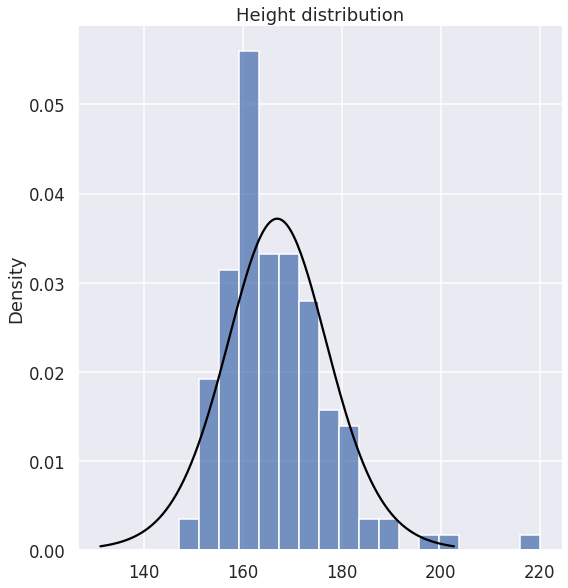

In [ ]:
#@title
# Show the distribution of 4 samples - take from the the height data of different candy lovers (bamba, bisli, ice-cream and chocolate) [All on the same graph and label them] 

heights = np.array([data['Height'],data['Candy']])

bamba = heights[0,heights[1,:]=='bamba'].astype(np.float);
icecream = heights[0,heights[1,:]=='icecream'].astype(np.float);
bisli = heights[0,heights[1,:]=='bisli'].astype(np.float);
chocolate = heights[0,heights[1,:]=='chocolate'].astype(np.float);


plt.figure(1);
plot_dist(heights[0,:].astype(np.float), bins=18, fit="t");
plt.title('Height distribution')

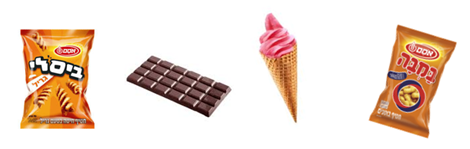

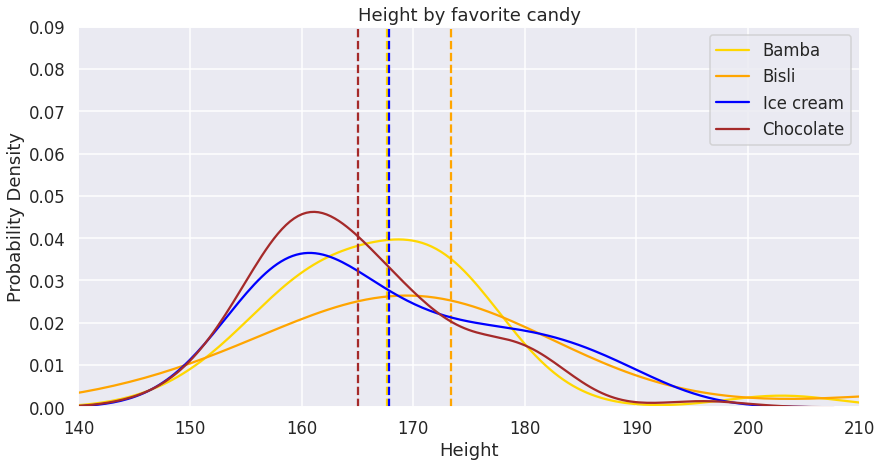

In [ ]:
#@title
# Show the distribution of 4 samples - take from the the height data of different candy lovers (bamba, bisli, ice-cream and chocolate) [All on the same graph and label them] 
plt.figure(2, figsize=(14,7));
ax = sns.kdeplot(bamba,color="gold",label="Bamba");
ax.axvline(x=np.mean(bamba), color='gold', linestyle='--');

sns.kdeplot(bisli.astype(np.float), color="orange",label="Bisli");
ax.axvline(x=np.mean(bisli), color='orange', linestyle='--');

sns.kdeplot(icecream.astype(np.float), color="blue",label="Ice cream");
ax.axvline(x=np.mean(icecream), color='blue', linestyle='--');


sns.kdeplot(chocolate.astype(np.float),color="brown",label="Chocolate");
ax.axvline(x=np.mean(chocolate), color='brown', linestyle='--');
plt.title('Height by favorite candy')
plt.xlim(140,210)
plt.ylim(0,0.09)
plt.xlabel('Height');
plt.legend();
plt.ylabel('Probability Density');

# Slide 2: How can we separate the different distributions? 

# Slide 3: Piece of cake! We just did that last class with the t-test. I'll just do that for all the different pairs. Let's see what happens if this is what we do

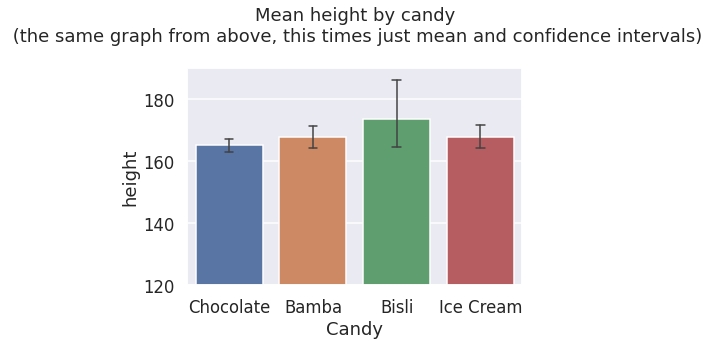

In [ ]:
#@title
# Show the graphs and t-test results of all the different pairs (properly labeled)
heights[np.where(heights=='bamba')] = 'Bamba'
heights[np.where(heights=='bisli')] = 'Bisli'
heights[np.where(heights=='icecream')] = 'Ice Cream'
heights[np.where(heights=='chocolate')] = 'Chocolate'

Tscores = np.zeros(6)
Tscores[0] = abs(stats.ttest_ind(bamba,chocolate).statistic)
Tscores[1] = abs(stats.ttest_ind(bamba,bisli).statistic)
Tscores[2] = abs(stats.ttest_ind(bamba,icecream).statistic)
Tscores[3] = abs(stats.ttest_ind(bisli,chocolate).statistic)
Tscores[4] = abs(stats.ttest_ind(icecream,chocolate).statistic)
Tscores[5] = abs(stats.ttest_ind(icecream,bisli).statistic)
englist = ["Chocolate","Bamba","Bisli","Ice Cream"];
compareList=["Bamba_Choco","Bamba_Bisli","Bamba_Icecream","Bisli_Choco","Icecream_Choco","Icecream_Bisli"]
Tdf = pd.DataFrame({'Comparison': compareList, 'T_score': Tscores})


plt.figure(1)
plt.title("Mean height by candy\n (the same graph from above, this times just mean and confidence intervals)\n")
df = pd.DataFrame({'height': heights[0,:].astype(np.float), 'Candy': heights[1,:]});
ax = sns.barplot(x='Candy', y='height', data=df, ci=95, errwidth=1.5, capsize=.1, order = englist);
plt.ylim(120,190);

<Figure size 432x288 with 0 Axes>

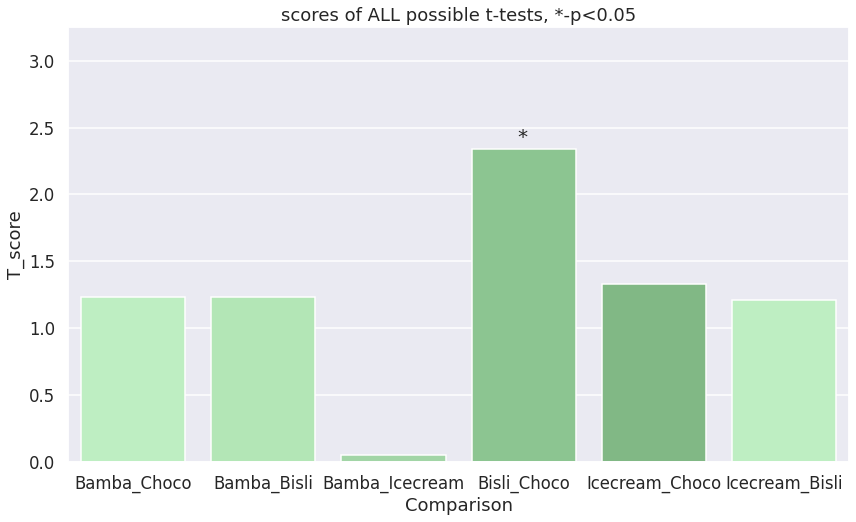

In [ ]:
#@title Among all comparisons we got one which looks significant (marked with an *)
plt.figure(2);
plt.figure(figsize=(14,8));
with sns.color_palette(colorsG):
  ax = sns.barplot(x='Comparison', y='T_score', data=Tdf);
ax.text(np.argmax(Tscores)-0.05,np.max(Tscores)+0.05,"*", fontsize=20);
plt.ylim(0,3.25);plt.title("scores of ALL possible t-tests, *-p<0.05");


## Question 2: What's the issue with doing a lot of t-testing?
### A. No issue, compadre. All is well.
### B. t-testing doesn't work if you run it on the same distribution compared with other distributions
### C. If you run enough tests, at the end some test will turn out to be significant by chance, giving you false results.
### D. You do not know the mean of the samples, so you cannot do T-testing
### E. The sample sizes are not large enough to get conclusive results

# Slide 3a: Let's see another example of doing many t-tests. This time we'll make it so that we know for certain that there shouldn't be any effect (because we will sample the different groups from the same distribution so by design there should not be any effect).

<Figure size 432x288 with 0 Axes>

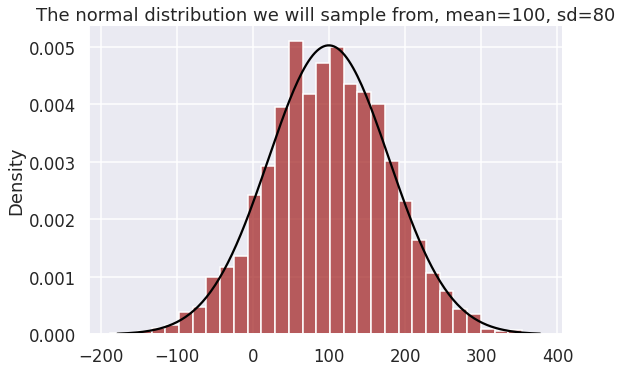

In [ ]:
#@title We are going to sample from the same Normal distribution many groups. They all come from the same distribution so there's no real effect
plot_dist(np.random.normal(100,80,3000), bins=30,color="brown",fit="Normal",height=5,aspect=1.6)
plt.title('The normal distribution we will sample from, mean=100, sd=80');


In [ ]:
#@title Here are the groups we sampled, their mean and 95% confidence intervals (95% CI) - change # of samples to see what happens! How many tests yielded significant difference? is there a real difference?
def sample_12_groups(nsamples = 6):
  group_size=20
  seed=33
  np.random.seed(seed)
  samples = np.zeros(group_size*nsamples) ##all the samples together
  distnum = np.zeros(group_size*nsamples)
  sep_samples=  []
  for i in range(nsamples):##sample n distributions of mean 100 and sd 60, and put them on a vector with labels
    samples[(i*group_size):((i+1)*group_size)] = np.random.normal(100,80,group_size)
    sep_samples.append(samples[(i*group_size):((i+1)*group_size)]) ##for later calculation of t tests, separate samples
    distnum[(i*group_size):((i+1)*group_size)] = ([i+1]*group_size)
      
      
  distributions = {"observation":samples, "sample #":distnum}
  plt.figure(2,figsize=(14,5))
  df = pd.DataFrame.from_dict(distributions);
  ax = sns.barplot(x='sample #', y='observation',data=df, ci=95, errwidth=1.5, capsize=.1);
  plt.ylim(10,190);
  plt.title("Means and CI's of %s samples from this distribution" %str(nsamples))

  sample_n_groups_and_test(nsamples,group_size,seed)

_=interact(sample_12_groups,nsamples=(3,12))


interactive(children=(IntSlider(value=6, description='nsamples', max=12, min=3), Output()), _dom_classes=('wid…

## Although the groups are sampled from the same distribution - some t-tests come out as being significant (marked with an *)


# Slide 4: So running many t-tests has the potential of finidng effects that do no exist. How can we then tell if the distributions are the same or not?

# Slide 5: The answer is that we can focus on the variances in the different samples instead on their mean. Is the variance a different parameter than the mean or are we actually measuring the same thing again?

In [ ]:
#@title Two groups with the same mean and different variances look different - change the variance of one of them to see what happens. So the first thing to notice is that means and variances are not the same.

def plot_two_dist_twick_var(sd):
  ####
  expVal = 100
  varA = 20
  varB = sd
  ####

  plt.figure(1);##visualize distribution
  plt.figure(figsize=(14,8));

  sns.histplot(np.random.normal(expVal,varA,1000), bins=10,color="darkgreen",stat="density");
  sns.histplot(np.random.normal(expVal,varB,1000), bins=10,color="purple",stat="density");

  plt.xlim(-110,310);

_=interact(plot_two_dist_twick_var,
           sd=widgets.IntSlider(min=20, max=60, step=4, value=20))

interactive(children=(IntSlider(value=20, description='sd', max=60, min=20, step=4), Output()), _dom_classes=(…

# Slide 6: In order to understand how to know if different samples come from the same distribution or not, we want to consider their VARIANCE. Here's the logic behind it:

### 1. The variance of each sample tells us how spread it is (remember that variance is a measure for distance). It occurs naturally in every distribution or sample because of noise in the measurement or by other variables we did not control when we took the measurement.
### 2. Let's assume all samples come from the same distribution. Then we would expect that each variance of each sample represents the variance of the distribution (with a bias we need to fix like we saw in previous classes).
### 3. We can also measure the mean of each sample. How far are the means from one another? To infer that, we can measure the average distance between these means. This distance can also be viewed as a variance measure of the means.
### 4. The only thing left to do is to compare the two - the distance between the means and the average variance of all samples. If the two are the same (meaning their ratio is close to 1), then the distance between the means is close to the variance of the samples and probably the different samples come from the same distribution. If the distance between the means of the samples is much larger than their averaged variance (ratio>1), then probably the samples come from different distributions.

# Slide 7: Let's see how can we quantify that:

## Assume we have all the values from all the samples, and each sample has its own mean. Then we can write down the total variation (sum of squares) of all the observations (combined as one group) compared to their distance between the groups and the variation within each group:

# Sum of squares in total = Sum of squares between the groups + Sum of squares within each group
## In a formula this will be written as follows:
# $$ \textrm{(1)  } SST = SSB + SSW $$
## where 
## $$ SST = \sum_{j=1}^k\sum_{i=1}^{n_j} (x_{i,j}-\overline{x})^2 $$
## $$ SSB = \sum_{j=1}^k n_j (\overline{x}_{j}-\overline{x})^2 $$
## $$ SSW = \sum_{j=1}^k\sum_{i=1}^{n_j} (x_{i,j}-\overline{x}_j)^2 $$

# Slide 7a: As intuition for Eq. (1) written above one can think of the following:
## Eq. (1) can also be written as
## (Distance in total)^2 = (Distance between groups)^2 + (Distance within each group)^2
## This is like the Pythagorian theorem: $$ C^2 = A^2 + B^2 $$

### Similarly to the Pythagorian theorem, we assume that the two measures - the sum of squares between groups and the sum of squares within each group are **independent** - if this is not the case, our calculation is not valid!

In [ ]:
#@title Set the variances & means of four distributions - What parameters make them look different?

def sumSquare(arr):##un-normalized variance - the sum of squares within a sample/vector
  m = np.mean(arr);
  ss=0;
  for i in arr:
    ss+=(i-m)**2
  return (ss)

def plot_4_dists_twick_mu_sig(sds,Means):
  colors = ["skyblue", "steelblue","blue", "navy"]
  var=sds
  expVal=Means
  plt.figure(1);##visualize distribution
  plt.figure(figsize=(14,8));
  dist=[];
  ssBetween=0;
  ssFromDist = [];##the actual variances and means we sampled
  meanFromDist=[];
  for i in range(len(expVal)): ##run on all distributions and plot them
    dist.append(np.random.normal(expVal[i],var[i],30)); ##calculate new sample
    ssFromDist.append(sumSquare(dist[i])); ##add its sum of square for SSW
    meanFromDist.append(np.mean(dist[i])); ##calculate mean for SSB
    sns.kdeplot(dist[i], color=colors[i]); #plot histogram
  plt.ylabel('Probability Density');
  plt.title("4 samples from 4 different distributions");

_=interact(plot_4_dists_twick_mu_sig,  sds=[[5,5,5,5],[1,1,1,1],[1,2,3,4],[9,9,9,9]],
         Means = [[1,2,8,9],[2,2,8,8],[1,1,1,1],[1,1,1,10]])

####

interactive(children=(Dropdown(description='sds', options=([5, 5, 5, 5], [1, 1, 1, 1], [1, 2, 3, 4], [9, 9, 9,…

In [ ]:
#@title Here's how the total sum of squares is distributed between the within groups and the between groups sum of squares


def plot_SS_twick_mu_sig(sds,Means):
  np.random.seed(1)
  colors = ["skyblue", "steelblue","blue", "navy"]
  var=sds # sds are standard devs of dists
  expVal=Means
  dist=[];
  ssBetween=0;
  ssFromDist = [];##the actual variances and means we sampled
  meanFromDist=[];
  for i in range(len(expVal)): ##run on all distributions and plot them
    dist.append(np.random.normal(expVal[i],var[i],30)); ##calculate new sample
    ssFromDist.append(sumSquare(dist[i])); ##add its sum of square for SSW
    meanFromDist.append(np.mean(dist[i])); ##calculate mean for SSB

  ssWithin = np.sum(ssFromDist); ##the total sum of squares within: ss(sample1)+ss(sample2)+...ss(sample4)
  ssBetween = 30*sumSquare(meanFromDist); #the variance between the (means of the) samples we took 
  ssTotal= sumSquare(np.ravel(dist)); ##total variance of all the samples together
  print("Total sum of squares:",ssTotal)
  print("Total sum between groups:",ssBetween)
  print("Total sum within groups:",ssWithin)

  plt.figure(2);
  #Plot sst compared to ssb+ssw
  plt.figure(figsize=(10,8));
  plt.title("What are the components of the total sum of squares?\n")
  ax=sns.barplot(x = ["Total sum of squares","Between+within\n groups sum of squares"], y = [ssTotal,ssBetween+ssWithin])
  bottom_plot = sns.barplot(x = ["Total sum of squares","Between+within\n groups sum of squares"],y=[0,ssBetween], color = "#9A76B3")
  ax.text(0.7,ssBetween/2,"SS between groups");
  ax.text(0.7,ssBetween+(ssTotal-ssBetween)/2,"SS within groups");
  plt.ylabel('Sum of squares');
  plt.ylim(0,10000);

_=interact(plot_SS_twick_mu_sig, sds=[[5,5,5,5],[1,1,1,1],[1,2,3,4],[9,9,9,9]],
         Means = [[1,2,8,9],[2,2,8,8],[1,1,1,1],[1,1,1,10]])


interactive(children=(Dropdown(description='sds', options=([5, 5, 5, 5], [1, 1, 1, 1], [1, 2, 3, 4], [9, 9, 9,…

# Slide 8: Next, we'll use that to seperate between different samples -
## If all the samples come from the same distribution - the division to different groups is fake. We then expect that the two estimates for the variances (between and within) will be the same.
## This stems from the null hypothesis that there's no effect, and thus the difference we see between the groups can be explained by the same variance we estimate from the measurments of each group by itself (SS within).

<Figure size 432x288 with 0 Axes>

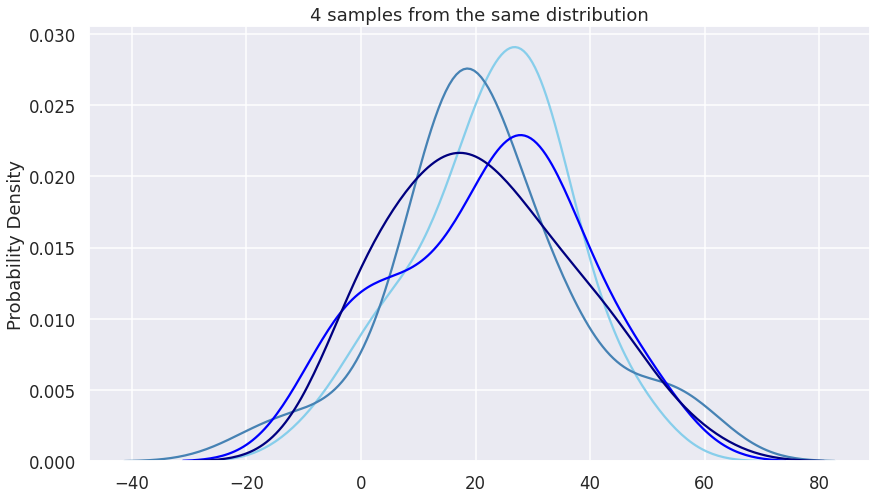

In [ ]:
#@title Sample 4 times from the same distribution: change the parameters of distribution and run again
expected_value =  20#@param {type:"number"}
sd =  15#@param {type:"number"} standard deviation
nsamples =  4
size = 30 
colors = ["skyblue", "steelblue","blue", "navy","lightblue","darkblue"]
####
plt.figure(1);##visualize distribution
plt.figure(figsize=(14,8));
dist=[];
ssBetween=0;
ssFromDist = [];##the actual variances and means we sampled
meanFromDist=[];
for i in range(nsamples): ##run on all distributions and plot them
  dist.append(np.random.normal(expected_value,sd,size)); ##calculate new sample
  ssFromDist.append(sumSquare(dist[i])); ##add its sum of square for SSW
  meanFromDist.append(np.mean(dist[i])); ##calculate mean for SSB
  sns.kdeplot(dist[i], color=colors[i%6]); #plot histogram
plt.ylabel('Probability Density');
plt.title("%s samples from the same distribution" %nsamples);


### If we take a few samples from the same distribution, the SS within should be equal or bigger in magnitude to the SS between


Total sum of squares: 27838.32
Total sum between groups: 52.22
Total sum within groups: 27786.1

Mean sum of squares within groups: 239.535
Mean sum between groups: 17.407


<Figure size 432x288 with 0 Axes>

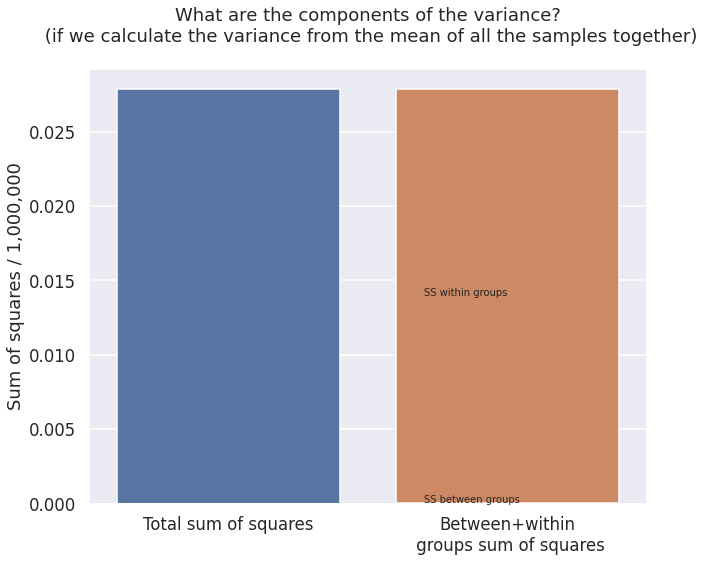

In [ ]:
#@title Indeed the SS within dominates the SS between (RUN AGAIN after you change the values above - what happened to the sum of squares? is it smaller or bigger now?)

ssWithin = np.sum(ssFromDist); ##the total sum of squares within: ss(sample1)+ss(sample2)+...ss(sample4)
ssBetween = size*sumSquare(meanFromDist); #the variance between the (means of the) samples we took 
ssTotal= sumSquare(np.ravel(dist)); ##total variance of all the samples together

DFbetween = nsamples - 1
DFwithin = nsamples*size - nsamples
DFtotal = nsamples*size- 1

msWithin = ssWithin/DFwithin
msBetween = ssBetween/DFbetween


###sanity check:
print("Total sum of squares:",np.round(ssTotal,2))
print("Total sum between groups:",np.round(ssBetween,2))
print("Total sum within groups:",np.round(ssWithin,2))

print("\nMean sum of squares within groups:",np.round(msWithin,3))
print("Mean sum between groups:",np.round(msBetween,3))
# print("MSB/MSW:",np.round(msBetween / msWithin,3))


ssBetween /= 1e6 # for viz purposes
ssWithin /=1e6
ssTotal /= 1e6
plt.figure(2);
plt.figure(figsize=(10,8));
#Plot sst compared to ssb+ssw
ax=sns.barplot(x = ["Total sum of squares","Between+within\n groups sum of squares"], y = [ssTotal,(ssBetween+ssWithin)]);
bottom_plot = sns.barplot(x = ["Total sum of squares","Between+within\n groups sum of squares"],y=[0,ssBetween], color = "#9A76B3");
ax.text(0.7,ssBetween/4,"SS between groups");
ax.text(0.7,ssBetween+(ssTotal-ssBetween)/2,"SS within groups");
plt.ylabel('Sum of squares / 1,000,000');
plt.title("What are the components of the variance?\n (if we calculate the variance from the mean of all the samples together)\n");

# Slide 9: Once we understand that, we can build a new statistic called the F-value with its F-distribution. 

## The F-distribution tells us how likely are different values for the ratio of the mean SSB divided by the mean SSW, and it represents the null hypothesis ($H_0$) that all samples are taken from the same Normal distribution. Let's see how to build the F-distribution (usually this part is already given to you).

In [ ]:
#@title Plot the distributions of (mean SSB) / (mean SSW) for different parameters! Set the number of samples and observations in each sample:
# Repeat for 1000 times to show the F-distribution - 3 random samples from the same Normal distribution, with sample size of 20 in each group, show the ratio of the MSB and MSW.
# Label it as the F-distribution with the proper parameters
import warnings
warnings.filterwarnings("ignore")
def plot_F_dist(nsamples,samples_size,α=5):
  alpha=α/100
  reps=20000
  np.random.seed(1)
  F = np.random.f(nsamples-1,samples_size*nsamples-nsamples,reps)
  critF=round(stats.f(nsamples-1,samples_size*nsamples-nsamples).interval((1-2*alpha))[1],3)
  print("critical F =", critF)
  meanF = np.mean(F)
  medianF = np.median(F)
  F = np.random.f(nsamples-1,samples_size*nsamples-nsamples,1000)
  F=F[F<12];F=F[~np.isnan(F)] #clean extremes for visualization
  plot_dist(F, bins=20,color='orange', kde=False, fit="F",height=7, aspect=1.5); #plot F-distribution
  plt.axvline(x=meanF, color='black', linestyle='-',label="mean");
  plt.axvline(x=medianF, color='r', linestyle='-',label="median");
  plt.axvline(x=critF, color='b', linestyle='--', label="95% of distribution"); ##the blue line signals for 95% of the distribution
  plt.ylabel('Probability Density');
  plt.legend()
  plt.xlim(0,10)
  plt.title("The F("+str(nsamples-1)+","+str(samples_size*nsamples-nsamples)+f") distribution \n (MSB/MSW of samples from the SAME distribution over 1000 repetitions)\n alpha={alpha}");  

_=interact(plot_F_dist, nsamples = (3,8), ##minimum 2
           samples_size = (5,100,5),α=(0.5,5,0.5))

interactive(children=(IntSlider(value=5, description='nsamples', max=8, min=3), IntSlider(value=50, descriptio…

#Slide 10: So in order to separate between many distributions we focus on the *variance of each group* and the *variance between the means of these groups*. 
## We will calculate the ratio between the **variance between** (average SSB) to the **variance within** (average SSW).

## Note that the two variances reflect two different measures - 

## The **variance within each sample** is pure **noise**, errors between different individuals that supposedly have the same mean.

## The **variance between the samples** has **noise** in it, but can also indicate a true **distance between the means** of the samples. If it has the same value as the variance within each sample, then all samples are drawn from the same distribution. If it is very different from the variance within, we can deduce that there is a difference between the means of the samples.

## To measure if the two variances are the same of not, we'll look at their ratio (see Equations sheet for more details):
# $$ F_{(k-1,N-k)} =  \frac{MSB}{MSW} = \frac{SSB/(k-1)}{SSW/(N-k)}$$
## k = number of groups

## N = total number of measures

## Run the F test on the samples that are taken from the populations with the following means. Is the test significant? change the values and "feel" how F change.

F-score is: 1.412 with a p-value of: 0.242 




<Figure size 432x288 with 0 Axes>

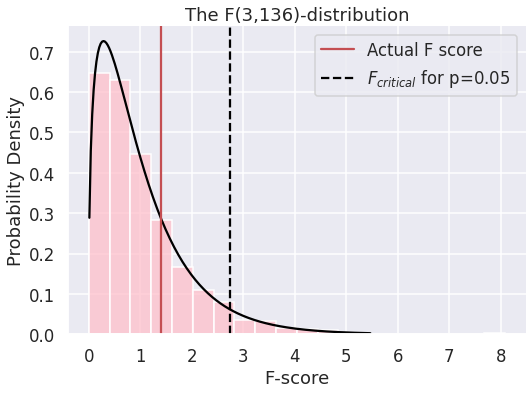

<Figure size 432x288 with 0 Axes>

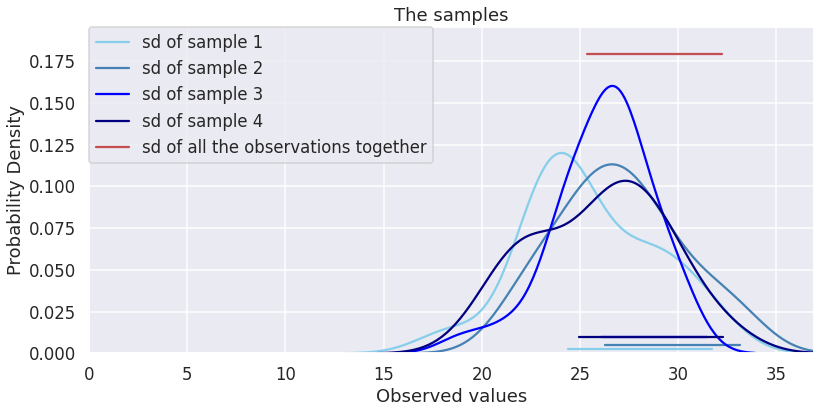

In [ ]:
#@title Taking four samples from close populations and performing F test  (change the values and run again!)
# Calculate the F statistic for samples from 4 different Normal distributions with tweakable mean, and sample size for each sample. 
# (start with very close samples and assess the separability and then ask for very far groups with small variances)
# Show 2 plots one next to each other: 

# Plot 1:  in Blue the proper F-distribution that corresponds to this scenario, in Red a line at the F value found, and in Black the 5% p-value line
# Plot 2:  the distributions, show a horizontal red line that is the variance of all the samples together, and under each distribution
#a horizontal line with it's own variance (with corresponding color)

####
size=35 #@param {type:"number"}
mean1 =  26#@param {type:"number"}
mean2 =  26#@param {type:"number"}
mean3 =  26#@param {type:"number"}
mean4 = 26 #@param {type:"number"}
variance = 12 #@param{type:"number"}
allMean = np.mean([mean1,mean2,mean3,mean4])

varAll=np.sqrt(variance)

####

def perform_f_test_andplot(size=30, mean1=31, mean2=32, mean3=35, mean4=32,varAll=10,group_number=1):
  np.random.seed(group_number)
  var1 = varAll
  var2 = varAll
  var3 = varAll
  var4 = varAll
  allMean = np.mean([mean1,mean2,mean3,mean4])
  

  d1 = np.random.normal(mean1, var1, size)
  d2 = np.random.normal(mean2, var2, size)
  d3 = np.random.normal(mean3, var3, size)
  d4 = np.random.normal(mean4, var4, size)

  Alldist=[d1,d2,d3,d4];
  Allsd=np.std(np.ravel(Alldist))
  maxX = np.max(Alldist)
  Fdist = np.random.f(3,4*size-4,2000);

  F, p = stats.f_oneway(d1,d2,d3,d4)
  print("F-score is:", np.round(float(F),3),"with a p-value of:", np.round(float(p),4),"\n\n")
  plot_dist(Fdist, bins=20,color='pink', kde=False, fit="F", height=5, aspect=1.5); #plot F-distribution
  plt.axvline(x=F, color='r', linestyle='-', label="Actual F score");
  plt.axvline(x=np.percentile(Fdist,95), color='black', linestyle='--', label= "$F_{critical}$ for p=0.05"); ##the blue line signals for 95% of the distribution
  plt.ylabel('Probability Density');
  plt.xlabel("F-score")
  plt.legend();
  plt.title(f'The F({4-1},{(size-1)*4})-distribution');
  plt.figure(2);
  plt.figure(figsize=(13,6));
  peak=[];

  for i in range(len(Alldist)):
    sd = (np.std(Alldist[i]))##calculate variance within the current group
    peak.append (stats.norm.pdf(np.mean(Alldist[i]),np.mean(Alldist[i]),sd)) ##Get peak for locations of lines and limits
    ax=sns.kdeplot(Alldist[i],color=colors[i]); #plot all the samples
    plt.axhline(y=0.02*peak[i]*(i+1),xmin=(np.mean(Alldist[i])-sd)/maxX,xmax=(np.mean(Alldist[i])+sd)/maxX,
                color=colors[i], label = "sd of sample "+str(i+1))
  peak=np.max(peak);  
  ax.set(ylim=(0, peak*1.2),xlim=(0,maxX*1.1));
  plt.axhline(y=peak*1.1,xmin=(np.mean(Alldist)-Allsd)/maxX,xmax=(np.mean(Alldist)+Allsd)/maxX,color='r',
              label ="sd of all the observations together");
  plt.title('The samples');
  plt.ylabel('Probability Density');
  plt.xlabel("Observed values");
  plt.legend(loc="upper left", borderaxespad=0.);

perform_f_test_andplot(size, mean1, mean2, mean3, mean4,varAll,group_number)
#inter = interact_manual(perform_f_test_andplot,size=(20,100,10),
#                        mean1=(10.0,40.0), mean2=(10.0,40.0), mean3=(10.0,40.0), mean4=(10.0,40.0),varAll=(1.0,30.0))
#inter.widget.children[6].description="Run"
#display(inter)


## Question 3: The F statistic (separating multiple samples) is dependent on:
### A. The distance between the means, the number of samples (groups), the variance of each sample, and the size of each sample
### B. The variance of each sample, the total variance, and the number of samples
### C. The variance and sample size of each sample
### D. The sum of squares between samples and the sum of squares within each sample

#Slide 11: Please remember that this method is valid only if we have samples taken from Normal distributions which are independent, otherwise - it's a completely different ball game.

# Slide 12: The statistical test is called ANOVA - ANalysis Of VAriance, and the way to notate it is as follows:

## F(degrees of freedom between, degrees of freedom within) = Value of the F statistic

## The **degrees of freedom between** is the number of samples you have minus 1 ($k-1$).

## The **degrees of freedom within** is the number of all observations minus the number of samples ($N-k$).

### The degrees of freedom represent (roughly) the number of observations we have - the more we have, the better is the separation we can reach.

### We will do more ANOVA tests in later classes, it's one of the most common statistical tests so if you got attached - don't worry, it will be back!

## Question 4: The difference between the conclusions of the t-test and the ANOVA test is:
### A. ANOVA says that there is a difference in the variance, t-test looks at the means
### B. ANOVA says that there is some difference between the means, but we don't know which group is the different one, in a t-test we know which group is different from which so a t-test is more concrete.
### C. ANOVA and t-test are exactly the same: Both indicate that the means of the samples are different or not
### D. ANOVA can be used only on more than two samples, and t-test can be used only on two samples.

# Slide 13: To conclude, the ANOVA test is strong because it allows to calculate if there's a difference between many groups that we measure. However, it doesn't tell us **which** of the groups is different from which. We just know that there's an effect. 

# Extras

## Many t-tests on two close by ditributions that are sampled some even number of times

In [ ]:
# Show 4 samples taken from 2 different but close distributions (2 per each distribution) with a small sample size (5 samples per group) and calculate the t-test for all

####
nsamples=4 ##must be even
size=5
####

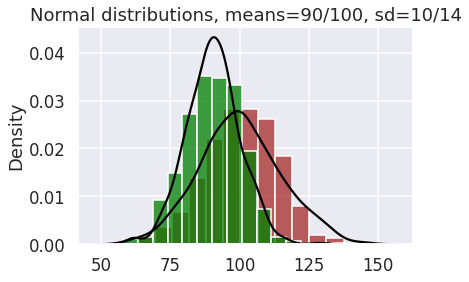

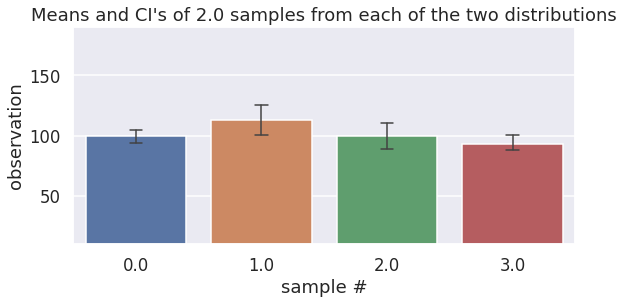

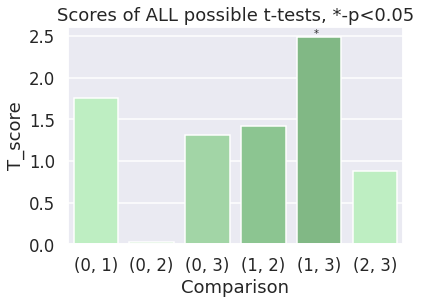

In [ ]:
#@title


plt.figure(1)##visualize distribution
sns.histplot(np.random.normal(100,14,500), bins=15,color="brown",stat="density")
sns.histplot(np.random.normal(90,10,500), bins=15,color="green",stat="density")
sns.kdeplot(np.random.normal(100,14,500),color="black")
sns.kdeplot(np.random.normal(90,10,500),color="black")
plt.title('Normal distributions, means=90/100, sd=10/14')


samples = np.zeros(size*nsamples) ##all the samples together
distnum = np.zeros(size*nsamples)
sep_samples=  []

expVal=100
Var=14
for i in range(nsamples):##sample n distributions, half from the green dist and half from brown dist
  if i>nsamples/2:
    expVal=90
    Var=10    
  samples[(i*size):((i+1)*size)] = np.random.normal(expVal,Var,size)
  sep_samples.append(samples[(i*size):((i+1)*size)]) ##for later calculation of t tests, separate samples
  distnum[(i*size):((i+1)*size)] = [i]*size

  
distributions = {"observation":samples, "sample #":distnum}
plt.figure(2,figsize=(9,4))
df = pd.DataFrame.from_dict(distributions);
ax = sns.barplot(x='sample #', y='observation',data=df, ci=95, errwidth=1.5, capsize=.1);
plt.ylim(10,190);
plt.title("Means and CI's of %s samples from each of the two distributions" %str(nsamples/2))


Tscores = np.zeros(len(list(itr.combinations(range(nsamples),2))))
pVals = np.zeros(len(list(itr.combinations(range(nsamples),2))))
k=0;
compareList=[]
for i in list(itr.combinations(range(nsamples),2)):###run on all possible comparisons and calculate t scores
  Tscores[k] = abs(stats.ttest_ind(sep_samples[i[0]],sep_samples[i[1]]).statistic)
  pVals[k] = stats.ttest_ind(sep_samples[i[0]],sep_samples[i[1]]).pvalue
  compareList.append(i)
  k=k+1

Tdf = pd.DataFrame({'Comparison': compareList, 'T_score': Tscores})
plt.figure(3)
#plt.figure(figsize=(14,8));
with sns.color_palette(colorsG):
  ax = sns.barplot(x='Comparison', y='T_score', data=Tdf);
plt.title("Scores of ALL possible t-tests, *-p<0.05")

for i in range(len(pVals)):##if the t-test score is significant, show *
  if pVals[i] < 0.05:
    ax.text(i-0.1,Tscores[i]+0.01,"*");

score 0.4386765439401558 rejection at: 2.063129303567749


Text(0.5, 1.0, 'The F distribution with many small samples \n (MSB/MSW of samples from the SAME distribution over 1000 repetitions)')

<Figure size 432x288 with 0 Axes>

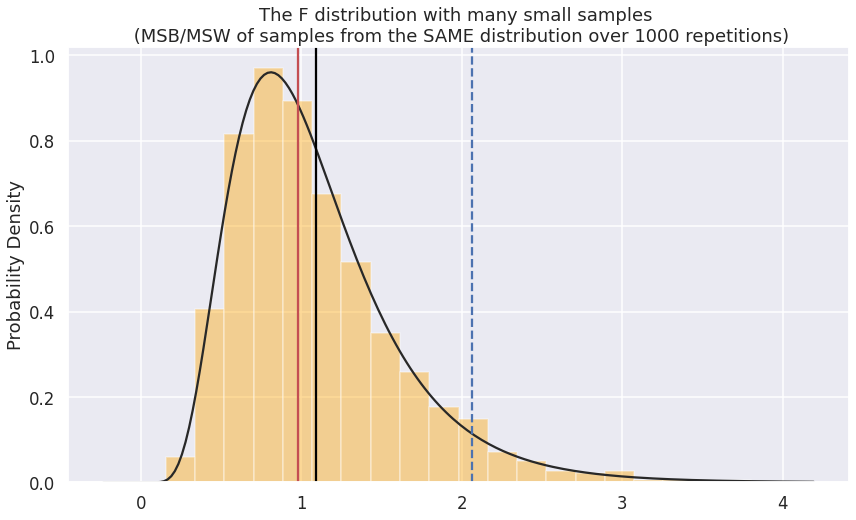

In [ ]:
#@title
# Repeat for 1000 times to show the F-distribution of this - 3 random samples from the same Normal distribution, with sample size of 20 in each group, show the ratio of the MSB and MSW.
# Label it as the F-distribution with the proper parameters

###
reps=1000;
expVal = 500
var = 150
nsamples = 20 ##minimum 2
size = 2
###
F=[]
for i in range(reps):
  dist=[];
  ssBetween=0;
  ssFromDist = [];##the actual variances and means we sampled
  meanFromDist=[];
  for i in range(nsamples): ##run on all distributions and plot them
    dist.append(np.random.normal(expVal,var,size)); ##calculate new sample
    ssFromDist.append(sumSquare(dist[i])); ##add its sum of square for SSW
    meanFromDist.append(np.mean(dist[i])); ##calculate mean for SSB
#  
#Calculating measures for one-way ANOVA  

  ssWithin = np.sum(ssFromDist); ##the total sum of squares within: ss(sample1)+ss(sample2)+...ss(sample4)
  ssBetween = size*sumSquare(meanFromDist); #the variance between the (means of the) samples we took 
  ssTotal= sumSquare(np.ravel(dist)); ##total variance of all the samples together

  DFbetween = nsamples - 1
  DFwithin = nsamples*size - nsamples
  DFtotal = nsamples*size- 1

  msWithin = ssWithin/DFwithin
  msBetween = ssBetween/DFbetween
  F.append(msBetween/msWithin) ##current F score

df1= nsamples
df2= size
print("score",F[0],"rejection at:",np.percentile(F,95))  
plt.figure(1)
plt.figure(figsize=(14,8));
sns.distplot(F, bins=20,color='orange', kde=False, fit=stats.f); #plot F-distribution
plt.axvline(x=np.mean(F), color='black', linestyle='-');
plt.axvline(x=np.median(F), color='r', linestyle='-');
plt.axvline(x=np.percentile(F,95), color='b', linestyle='--'); ##the blue line signals for 95% of the distribution
plt.ylabel('Probability Density');
plt.title("The F distribution with many small samples \n (MSB/MSW of samples from the SAME distribution over 1000 repetitions)")

In [ ]:
#@title
#title A simulated version of the F-distribution (sample groups from the same distribution and calculate their F-value many many times to get a distribution of possible F-values for the null hypothesis)

# ###
# reps=1000;
# expVal = 500
# var = 150
# nsamples = 3 ##minimum 2
# size = 20
# ###

# F=[]
# for i in range(reps):
#   dist=[];
#   ssBetween=0;
#   ssFromDist = [];##the actual variances and means we sampled
#   meanFromDist=[];
#   for i in range(nsamples): ##run on all distributions and plot them
#     dist.append(np.random.normal(expVal,var,size)); ##calculate new sample
#     ssFromDist.append(sumSquare(dist[i])); ##add its sum of square for SSW
#     meanFromDist.append(np.mean(dist[i])); ##calculate mean for SSB
# #  
# #Calculating measures for one-way ANOVA  

#   ssWithin = np.sum(ssFromDist); ##the total sum of squares within: ss(sample1)+ss(sample2)+...ss(sample4)
#   ssBetween = size*sumSquare(meanFromDist); #the variance between the (means of the) samples we took 
#   ssTotal= sumSquare(np.ravel(dist)); ##total variance of all the samples together

#   DFbetween = nsamples - 1
#   DFwithin = nsamples*size - nsamples
#   DFtotal = nsamples*size- 1

#   msWithin = ssWithin/DFwithin
#   msBetween = ssBetween/DFbetween
#   F.append(msBetween/msWithin) ##current F score
# print("critical F =", round(np.percentile(F,95),3))
